In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from config import db_password
#scikitlearn imports

In [ ]:
## Examining the Data & Transformations

In [113]:
air_customer_df = pd.read_csv(r'C:\Users\pepli\Downloads\train.csv\train.csv', low_memory=False)

In [114]:
air_customer_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [115]:
air_customer_df.sample(n=10)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
62941       62941   35394  Female  disloyal Customer   37  Business travel   
54831       54831  105213    Male     Loyal Customer   40  Business travel   
83181       83181    3412    Male     Loyal Customer   40  Personal Travel   
90422       90422  118060    Male     Loyal Customer   60  Business travel   
61346       61346  119346    Male     Loyal Customer   35  Business travel   
32595       32595   97108    Male     Loyal Customer   59  Business travel   
86460       86460   30662    Male     Loyal Customer   45  Personal Travel   
81419       81419   56516    Male  disloyal Customer   26  Business travel   
53956       53956   27292    Male     Loyal Customer   43  Business travel   
4571         4571   83523  Female     Loyal Customer   27  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
62941       Eco              676                      1   
54831  Business             3341                      1   
83181       Eco              315                      2   
90422       Eco              644                      4   
61346  Business             2926                      5   
32595  Business              715                      3   
86460       Eco              770                      2   
81419  Business              937                      4   
53956       Eco             1050                      5   
4571        Eco              946                      3   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
62941                                  1  ...                       4   
54831                                  1  ...                       5   
83181                                  3  ...                       4   
90422                                  1  ...                       4   
61346                                  5  ...                       5   
32595                                  3  ...                       4   
86460                                  4  ...                       1   
81419                                  4  ...                       4   
53956                                  2  ...                       5   
4571                                   4  ...                       3   

       On-board service  Leg room service  Baggage handling  Checkin service  \
62941                 2                 5                 3                2   
54831                 5                 5                 5                5   
83181                 1                 5                 4                5   
90422                 3                 4                 2                3   
61346                 5                 5                 5                3   
32595                 4                 4                 4                4   
86460                 3                 2                 4                5   
81419                 5                 4                 4                3   
53956                 2                 4                 5                2   
4571                  1                 2                 4                4   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
62941                 3            4                           0   
54831                 5            4                          31   
83181                 4            4                           0   
90422                 1            4                           4   
61346                 5            3                           0   
32595                 4            4                          20   
86460                 4            1                          12   
81419                 4            4                           0   
53956                 5            5                           0   
4571                  4            3                           0   

       Arrival Delay in Minutes             satisfaction  
62941

In [116]:
#Drop Unnamed & ID
air_customer_df = air_customer_df.drop(['id', 'Unnamed: 0'], axis=1)
air_customer_df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [117]:
air_customer_df.columns.to_list()

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [118]:
air_customer_df.shape

(103904, 23)

In [119]:
air_customer_df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [120]:
air_customer_df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [121]:
air_customer_df.columns = [c.replace(' ', '_') for c in air_customer_df.columns]

In [122]:
air_customer_df.columns.to_list()

['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

In [123]:
#Clean gender, customer type, type of travel,class, satisfaction (integer instead of object?)
# creating a dict file 
gender = {'Male': 1,'Female': 2}

  
# traversing through dataframe
# Gender column and writing
# values where key matches
air_customer_df.Gender = [gender[item] for item in air_customer_df.Gender]

In [124]:
air_customer_df.head()

Gender      Customer_Type  Age   Type_of_Travel     Class  Flight_Distance  \
0       1     Loyal Customer   13  Personal Travel  Eco Plus              460   
1       1  disloyal Customer   25  Business travel  Business              235   
2       2     Loyal Customer   26  Business travel  Business             1142   
3       2     Loyal Customer   25  Business travel  Business              562   
4       1     Loyal Customer   61  Business travel  Business              214   

   Inflight_wifi_service  Departure/Arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [125]:
air_customer_df.describe()

Gender            Age  Flight_Distance  Inflight_wifi_service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean        1.507459      39.379706      1189.448375               2.729683   
std         0.499947      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%         1.000000      27.000000       414.000000               2.000000   
50%         2.000000      40.000000       843.000000               3.000000   
75%         2.000000      51.000000      1743.000000               4.000000   
max         2.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival_time_convenient  Ease_of_Online_booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate_location  Food_and_drink  Online_boarding   Seat_comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight_entertainment  On-board_service  Leg_room_service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Inflight_service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [126]:
loyalty = {'Loyal Customer': 1, 'disloyal Customer': 0}
air_customer_df.Customer_Type = [loyalty[item] for item in air_customer_df.Customer_Type]

In [127]:
air_customer_df.head()

Gender  Customer_Type  Age   Type_of_Travel     Class  Flight_Distance  \
0       1              1   13  Personal Travel  Eco Plus              460   
1       1              0   25  Business travel  Business              235   
2       2              1   26  Business travel  Business             1142   
3       2              1   25  Business travel  Business              562   
4       1              1   61  Business travel  Business              214   

   Inflight_wifi_service  Departure/Arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival_Delay_in_Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [128]:
air_customer_df.dtypes

Gender                                 int64
Customer_Type                          int64
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

In [ ]:
## A few initial visualizations

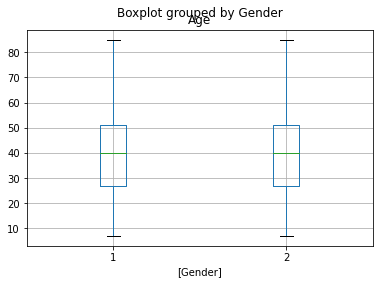

In [129]:
boxplot = air_customer_df.boxplot(column=['Age'], by = ['Gender'])

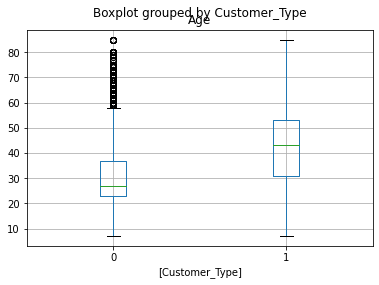

In [130]:
boxplot = air_customer_df.boxplot(column=['Age'], by = ['Customer_Type'])

In [ ]:
## Load to PostGresSQL Database